In [4]:
import pandas as pd
iris_data=pd.read_csv("/Users/gyl/Downloads/iris-data.csv")
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data=pd.read_csv('/Users/gyl/Downloads/iris-data.csv',na_values=['NA'])

In [6]:
iris_data.describe()

/Users/gyl/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,NaN
50%,5.700000,3.000000,4.350000,NaN
75%,6.400000,3.300000,5.100000,NaN
max,7.900000,4.400000,6.900000,2.500000


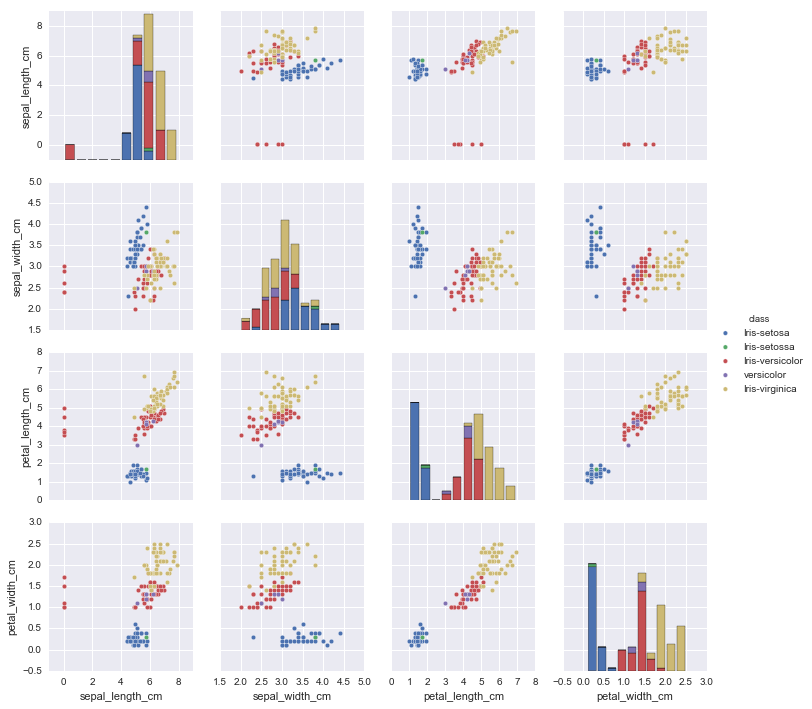

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(iris_data.dropna(),hue='class')

In [10]:
iris_data.loc[iris_data['class'] =='versicolor','class']='Iris-versicolor'
iris_data.loc[iris_data['class'] =='Iris-setossa','class']='Iris-setosa'
iris_data['class'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

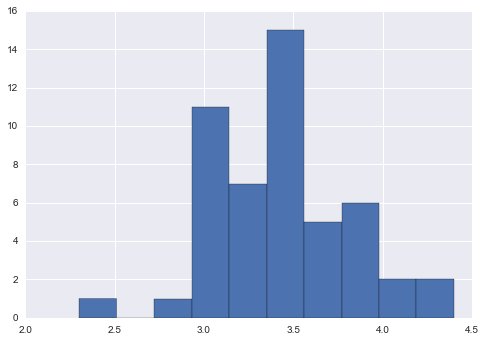

In [13]:
iris_data=iris_data.loc[(iris_data['class'] !='iris-setosa')|(iris_data['sepal_width_cm'] >=2.5)]
iris_data.loc[iris_data['class']=='Iris-setosa','sepal_width_cm'].hist()

In [14]:
iris_data.loc[(iris_data['class']=='Iris-versicolor')&(iris_data['sepal_length_cm']<1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


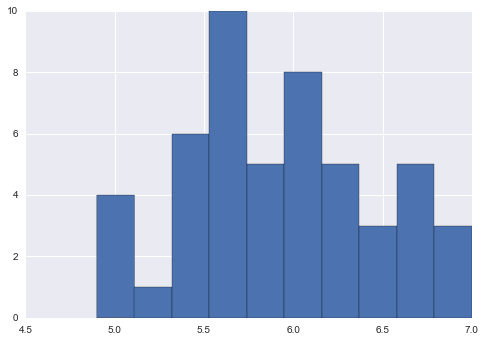

In [15]:
iris_data.loc[(iris_data['class']=='Iris-versicolor')&(iris_data['sepal_length_cm']<1.0),
              'sepal_length_cm']*=100.0
iris_data.loc[iris_data['class']=='Iris-versicolor','sepal_length_cm'].hist()

In [17]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull())|
             (iris_data['sepal_width_cm'].isnull())|
             (iris_data['petal_length_cm'].isnull())|
             (iris_data['petal_width_cm'].isnull())]


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


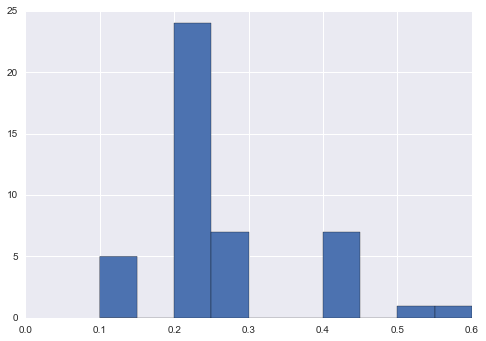

In [18]:
iris_data.loc[iris_data['class']=='Iris-setosa','petal_width_cm'].hist()

In [19]:
average_petal_width=iris_data.loc[iris_data['class']=='Iris-setosa','petal_width_cm'].mean()
iris_data.loc[(iris_data['class']=='Iris-setosa')&
             (iris_data['petal_width_cm'].isnull()),
             'petal_width_cm']=average_petal_width

iris_data.loc[(iris_data['class']=='Iris-setosa')&
             (iris_data['petal_width_cm']==average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.251111,Iris-setosa
8,4.4,2.9,1.4,0.251111,Iris-setosa
9,4.9,3.1,1.5,0.251111,Iris-setosa
10,5.4,3.7,1.5,0.251111,Iris-setosa
11,4.8,3.4,1.6,0.251111,Iris-setosa


In [20]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull())|
             (iris_data['sepal_width_cm'].isnull())|
             (iris_data['petal_length_cm'].isnull()|
             (iris_data['petal_width_cm'].isnull()))]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


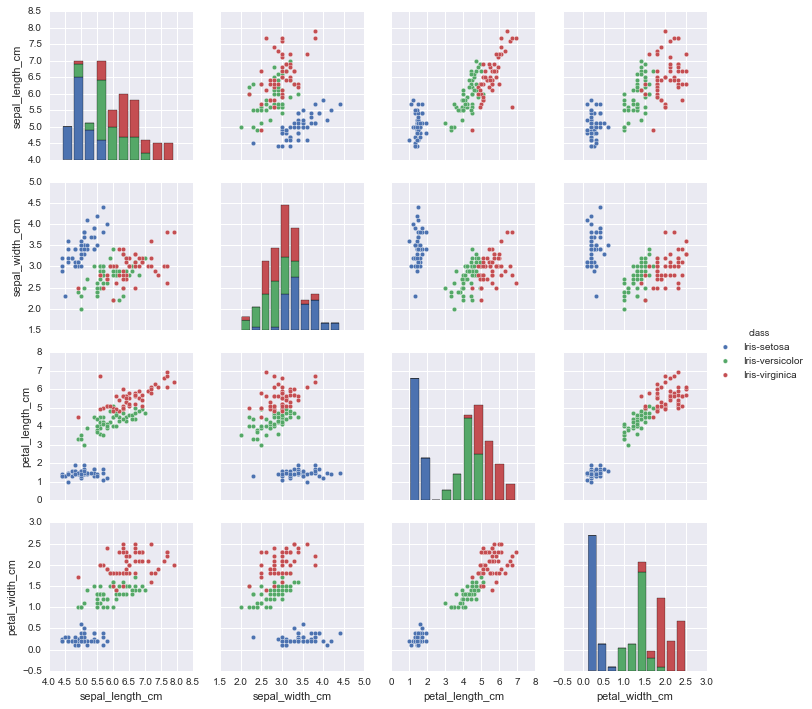

In [21]:
iris_data.to_csv('iris-data-clean.csv',index=False)

iris_data_clean=pd.read_csv('iris-data-clean.csv')

sb.pairplot(iris_data_clean,hue='class')

In [23]:
assert iris_data_clean.loc[iris_data_clean['class']=='Iris-versicolor','sepal_length_cm'].min()>=2.5

In [ ]:
assert len(iris_data_clean['class'].unique())==3

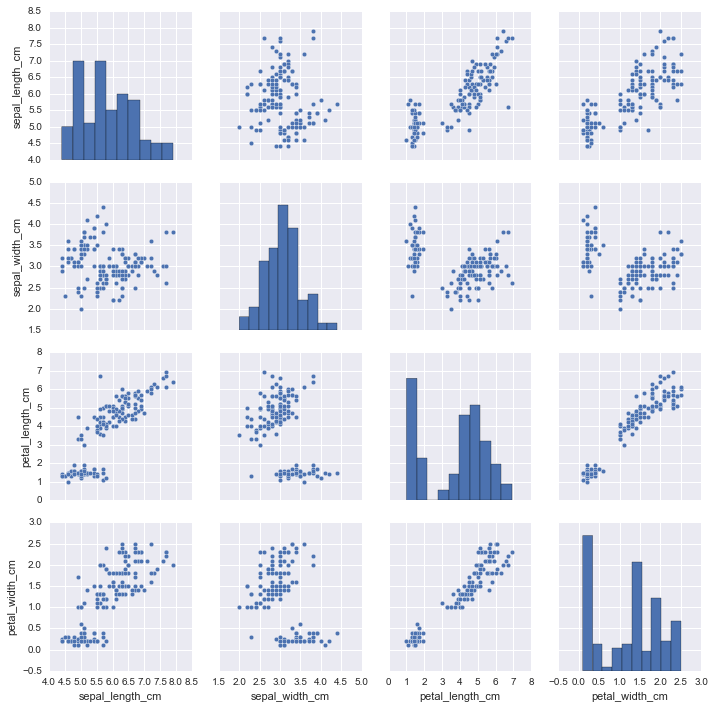

In [24]:
sb.pairplot(iris_data_clean)

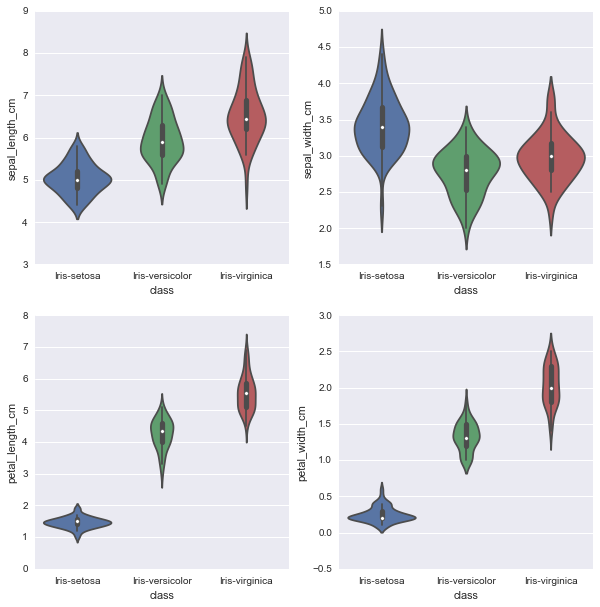

In [26]:
plt.figure(figsize=(10,10))

for column_index,column in enumerate(iris_data_clean.columns):
    if column=='class':
        continue
    plt.subplot(2,2,column_index+1)
    sb.violinplot(x='class',y=column,data=iris_data_clean)

In [27]:
iris_data_clean=pd.read_csv('iris-data-clean.csv')

all_inputs=iris_data_clean[['sepal_length_cm','sepal_width_cm',
                           'petal_length_cm','petal_width_cm']].values
all_classes=iris_data_clean['class'].values

all_inputs[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [32]:
from sklearn.cross_validation import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes)=train_test_split(all_inputs,all_classes,train_size=0.75,random_state=1)

In [33]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier=DecisionTreeClassifier()

decision_tree_classifier.fit(training_inputs,training_classes)

decision_tree_classifier.score(testing_inputs,testing_classes)


0.97368421052631582

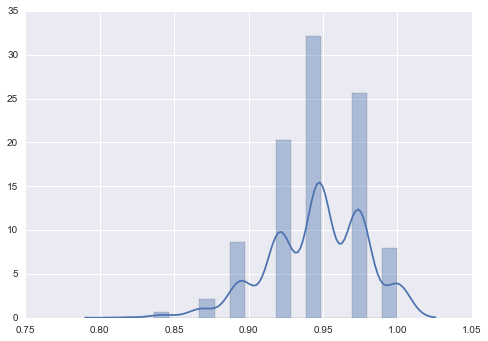

In [37]:
model_accuracies=[]

for repetition in range(1000):
    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes)=train_test_split(all_inputs,all_classes,train_size=0.75)
    
    decision_tree_classifier=DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs,training_classes)
    classifier_accuracy=decision_tree_classifier.score(testing_inputs,testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sb.distplot(model_accuracies)    

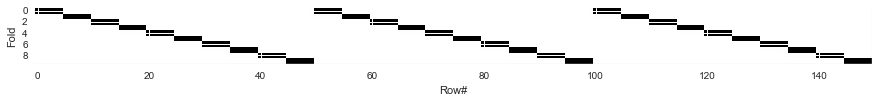

In [41]:
import numpy as np

from sklearn.cross_validation import StratifiedKFold

def plot_cv(cv,n_samples):
    masks=[]
    for train,test in cv:
        mask=np.zeros(n_samples,dtype=bool)
        mask[test]=1
        masks.append(mask)
        
    plt.figure(figsize=(15,15))
    plt.imshow(masks,interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row#')
    
    
plot_cv(StratifiedKFold(all_classes,n_folds=10),len(all_classes))    
    

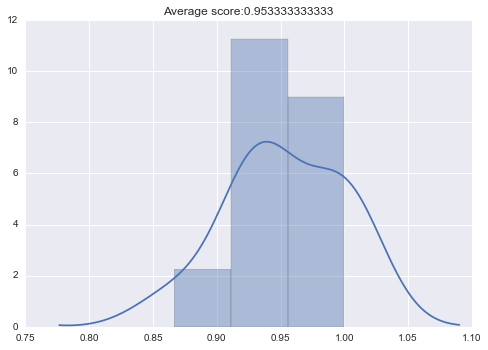

In [46]:
from sklearn.cross_validation  import cross_val_score

decision_tree_classifier=DecisionTreeClassifier()


cv_scores=cross_val_score(decision_tree_classifier,all_inputs,all_classes,cv=10)
sb.distplot(cv_scores)
plt.title('Average score:{}'.format(np.mean(cv_scores)))


In [52]:
array=np.zeros(10)
print array

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


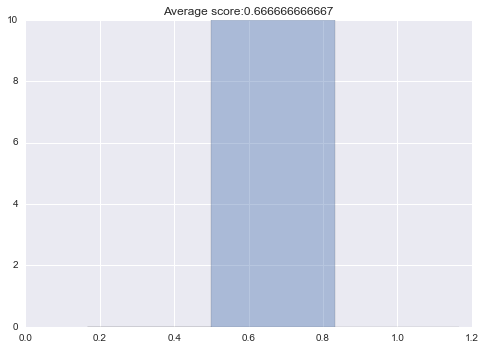

In [55]:
decision_tree_classifier=DecisionTreeClassifier(max_depth=1)

cv_scores=cross_val_score(decision_tree_classifier,all_inputs,all_classes,cv=10)
sb.distplot(cv_scores,kde=False)
plt.title("Average score:{}".format(np.mean(cv_scores)))

In [58]:
from sklearn.grid_search import GridSearchCV

decision_tree_classifier=DecisionTreeClassifier()

parameter_grid={'max_depth':[1,2,3,4,5],
               'max_features':[1,2,3,4]}

cross_validation=StratifiedKFold(all_classes,n_folds=10)

grid_search=GridSearchCV(decision_tree_classifier,
                        param_grid=parameter_grid,
                        cv=cross_validation)

grid_search.fit(all_inputs,all_classes)
print('Best score:{}'.format(grid_search.best_score_))
print('Best parameters:{}'.format(grid_search.best_params_))



Best score:0.966666666667
Best parameters:{'max_features': 3, 'max_depth': 3}


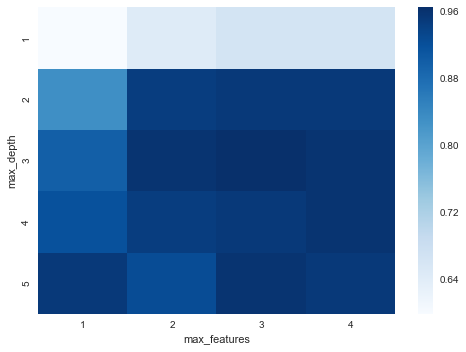

In [62]:
grid_visualization=[]
for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
    
grid_visualization=np.array(grid_visualization)
grid_visualization.shape=(5,4)
sb.heatmap(grid_visualization,cmap="Blues")
plt.xticks(np.arange(4)+0.5,grid_search.param_grid['max_features'])
plt.yticks(np.arange(5)+0.5,grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [69]:
decision_tree_classifier=DecisionTreeClassifier()

parameter_grid={'criterion':['gini','entropy'],
               'splitter':['best','random'],
               'max_depth':[1,2,3,4,5],
               'max_features':[1,2,3,4]}

cross_validation=StratifiedKFold(all_classes,n_folds=10)

grid_search=GridSearchCV(decision_tree_classifier,
                        param_grid=parameter_grid,
                        cv=cross_validation)

grid_search.fit(all_inputs,all_classes)
print("Best score:{}".format(grid_search.best_score_))
print("best parameter:{}".format(grid_search.best_params_))

Best score:0.966666666667
best parameter:{'max_features': 2, 'splitter': 'best', 'criterion': 'gini', 'max_depth': 3}


In [71]:
decision_tree_classifier=grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=2, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [75]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc.dat','w') as out_file:
    out_file=tree.export_graphviz(decision_tree_classifier,out_file=out_file)
    

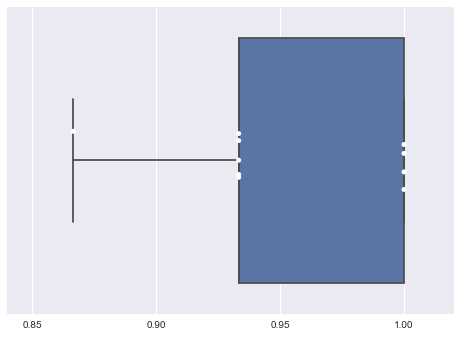

In [78]:
rf_scores=cross_val_score(decision_tree_classifier,all_inputs,all_classes,cv=10)
sb.boxplot(rf_scores)
sb.stripplot(rf_scores,jitter=True,color='white')


In [81]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier=RandomForestClassifier()
parameter_grid={'n_estimators':[5,10,25,50],
               'criterion':['gini','entropy'],
               'max_features':[1,2,3,4],
               'warm_start':[True,False]}

cross_validation=StratifiedKFold(all_classes,n_folds=10)

grid_search=GridSearchCV(random_forest_classifier,
                         param_grid=parameter_grid,
                         cv=cross_validation)

grid_search.fit(all_inputs,all_classes)

print("best score:{}".format(grid_search.best_score_))
print("best parameter:{}".format(grid_search.best_params_))

grid_search.best_estimator_

best score:0.966666666667
best parameter:{'max_features': 2, 'n_estimators': 25, 'criterion': 'gini', 'warm_start': False}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
%install_ext https://raw.githubusercontent.com/rasbt/wtermark/master/watermark.py

Installed watermark.py. To use it, type:
  %load_ext watermark


In [93]:
%load_ext watermark

SyntaxError: invalid syntax (watermark.py, line 1)

In [88]:
%watermark -a 'Randal S. Olson' -nmv --packages numpy,scikit-learn,pandas,matplotlib,Seaborn

ERROR: Line magic function `%watermark` not found.


[ 6.4  2.9  4.3  1.3]	-->	Iris-versicolor	(Actual:Iris-versicolor)
[ 6.3  2.9  5.6  1.8]	-->	Iris-virginica	(Actual:Iris-virginica)
[ 5.          3.4         1.5         0.25111111]	-->	Iris-setosa	(Actual:Iris-setosa)
[ 5.1  3.5  1.4  0.3]	-->	Iris-setosa	(Actual:Iris-setosa)
[ 4.8  3.1  1.6  0.2]	-->	Iris-setosa	(Actual:Iris-setosa)
[ 5.6  3.   4.1  1.3]	-->	Iris-versicolor	(Actual:Iris-versicolor)
[ 5.   3.   1.6  0.2]	-->	Iris-setosa	(Actual:Iris-setosa)
[ 6.   3.   4.8  1.8]	-->	Iris-virginica	(Actual:Iris-virginica)
[ 5.2  3.5  1.5  0.2]	-->	Iris-setosa	(Actual:Iris-setosa)
[ 7.9  3.8  6.4  2. ]	-->	Iris-virginica	(Actual:Iris-virginica)


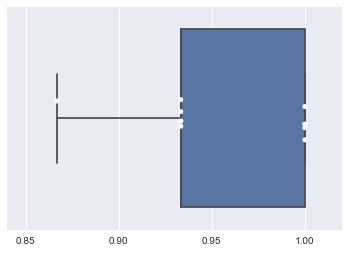

In [100]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

iris_data_clean=pd.read_csv('iris-data-clean.csv')

assert len(iris_data_clean['class'].unique())==3

assert iris_data_clean.loc[iris_data_clean['class']=="Iris-versicolor",
                          'sepal_length_cm'].min()>=2.5
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull())|
                               (iris_data_clean['sepal_width_cm'].isnull())|
                               (iris_data_clean['petal_length_cm'].isnull())|
                               (iris_data_clean['petal_width_cm'].isnull())])==0
                               
all_inputs=iris_data_clean[['sepal_length_cm','sepal_width_cm',
                           'petal_length_cm','petal_width_cm']].values
                               
all_classes=iris_data_clean['class'].values        

random_forest_classifier=RandomForestClassifier(bootstrap=True,class_weight=None,
                                               criterion='gini',max_depth=None,max_features=3,max_leaf_nodes=None,
                                               min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,
                                               n_estimators=5,n_jobs=1,oob_score=False,random_state=None,
                                               verbose=0,warm_start=True)
rf_classifier_scores=cross_val_score(random_forest_classifier,all_inputs,all_classes,cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores,jitter=True,color='white')

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes)=train_test_split(all_inputs,all_classes,train_size=0.75)

random_forest_classifier.fit(training_inputs,training_classes)
for input_features, prediction,actual in zip(testing_inputs[:10],
                                            random_forest_classifier.predict(testing_inputs[:10]),
                                            testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual:{})'.format(input_features,prediction,actual))

